In [1517]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

from PIL import Image


In [1518]:
def plot (arr_in):
    plt.imshow(arr_in, 'Greys')
    plt.show()

In [1519]:
def outer_product_3d(matrix1, matrix2):
    # Reshape matrix1 to (m, n, 1) and matrix2 to (1, p, q)
    return matrix1[:, :, np.newaxis] * matrix2[np.newaxis, :, :]

[[0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]]


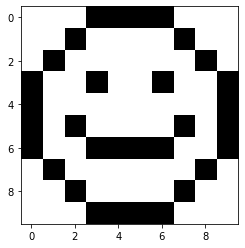

In [1520]:
smily = plt.imread('smily.png')
smily = 1 - smily
smily = np.array(smily).astype('float')
print(smily )
plt.imshow(smily, 'Greys')

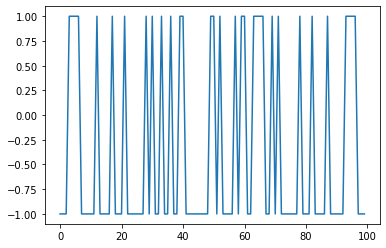

In [1521]:
smily = np.reshape(smily, (100))
smily = smily * 2 - 1
plt.plot(smily)

In [1522]:
class neuron ():
    def __init__(self, size) -> None:
        self.weights = np.random.rand(size)
        self.output = np.random.random(1)
        pass

    def __repr__(self) -> str:
        return f"Weights = {self.weights} \n\
            Current state = {self.output}"


first_neuron = neuron(10)
print(first_neuron)

Weights = [0.73139489 0.26718466 0.04592696 0.76484572 0.26893893 0.82150907
 0.10142964 0.79576505 0.32380554 0.96444975] 
            Current state = [0.56658314]


Internal weights: [[ 0.          0.78700918  0.08519142 ... -0.67114579  0.55893071
   0.03790993]
 [-0.67969074  0.         -0.59292218 ... -0.61855605 -0.15800453
   0.40494171]
 [ 0.15141965  0.15007715  0.         ...  0.91705786 -0.17058957
   0.47697738]
 ...
 [ 0.26230861  0.2656826  -0.5298424  ...  0.         -0.35571454
  -0.3933156 ]
 [-0.85228705  0.6218758  -0.83786254 ... -0.02275918  0.
   0.02271836]
 [-0.42445216 -0.47387781 -0.78134237 ... -0.36783438  0.41914076
   0.        ]]

            Current state: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


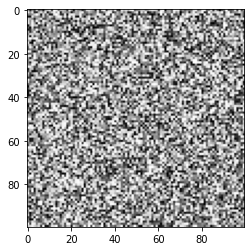

In [1601]:
class hopfield (): 
    def __init__(self, size) -> None:
        # Set weights to range [-1,1)
        self.size = size
        self.input_weights = np.ones(size) * 1 #np.full((shape[0], shape[1]), 1.0)
        self.internal_weights = np.random.rand(size, size) * 2 -1
        #Avoid self-feedback
        np.fill_diagonal(self.internal_weights, 0)
        self.outputs = np.zeros(size)#np.random.rand(size)*2 -1 
        self.learning_rate = 0.001
        self.hebb = np.zeros((size, size))

    def __repr__(self) -> str:
        return f"Internal weights: {self.internal_weights}\n\n\
            Current state: {self.outputs}"

    def update (self, input):
        #Behold! ReLU
        # print(f"Input shape: {input.shape}")
        # print(f"Input weights shape: {self.input_weights.shape}")
        input_activation = self.input_weights * input
        # print(f"Input activation = {input_activation}")

        # print(f"Internal weights shape: {self.internal_weights.shape}")
        # print(f"Ouputs shape: {self.outputs.shape}")
        self_activation = self.internal_weights @ self.outputs
        # print(f"Self activation = {self_activation}")

        new_outputs =  input_activation + self_activation
        new_outputs = np.clip(new_outputs, 0, None)
        new_outputs = np.around(new_outputs)
        # np.around(new_outputs)
        # print(f"New outputs: {new_outputs}")
        
        
        # hebb = new_outputs @ self.outputs.T #@ new_outputs.T #new_outputs @ self.outputs.T'
        self.hebb = np.outer( self.outputs, new_outputs,)
        # print(f"hebb: {self.hebb}")
        # plot(self.hebb)
        self.internal_weights += self.hebb * self.learning_rate * 1
        np.fill_diagonal(self.internal_weights, 0)
        # print(f"New weights: {self.internal_weights}")

        # self.internal_weights = np.clip(self.internal_weights, 0, None)
        self.input_weights = self.input_weights * 0.99

        self.outputs = new_outputs
        # self.outputs = np.clip(new_outputs, -1, 1)

    def visualize_weights (self):
        plot(self.internal_weights)

    def visualize_outputs (self):
        output_im = np.reshape(self.outputs, (10,10))
        plot(output_im)

hop = hopfield(100)
print(hop)
hop.visualize_weights()

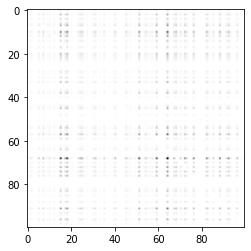

Current weights: [[ 0.00000000e+000  4.47781245e+147  2.30296810e+147 ...  2.83564954e+140
   1.48238063e+147  3.79099348e-002]
 [ 3.63618722e+140  0.00000000e+000  5.17829641e+146 ...  6.37604743e+139
   3.33317961e+146  4.04941709e-001]
 [ 4.03458883e+141  1.11716656e+148  0.00000000e+000 ...  7.07464389e+140
   3.69838195e+147  4.76977384e-001]
 ...
 [ 2.83015295e+140  7.83661577e+146  4.03042252e+146 ...  0.00000000e+000
   2.59431309e+146 -3.93315599e-001]
 [ 9.69847470e+140  2.68548100e+147  1.38116037e+147 ...  1.70062571e+140
   0.00000000e+000  2.27183624e-002]
 [-4.24452162e-001 -4.73877811e-001 -7.81342366e-001 ... -3.67834380e-001
   4.19140757e-001  0.00000000e+000]]


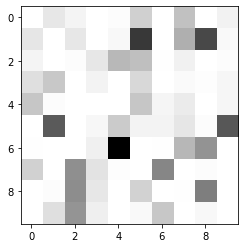

In [1610]:
for i in range (0, 1):
    hop.update(smily)
hop.visualize_weights()
# plot(hop.hebb)
print(f"Current weights: {hop.internal_weights}")
hop.visualize_outputs()

In [1574]:
print(hop.outputs)
print(hop.hebb)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [1575]:
print(hop.input_weights)

[4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.06448725e-05 4.06448725e-05 4.06448725e-05
 4.06448725e-05 4.064487

## Reconstruction
If the network has been successfully trained, it will re-form the learned pattern after distortion of state

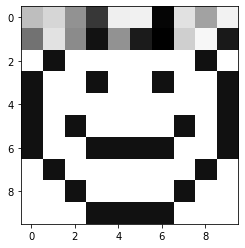

In [1496]:
hop.outputs[:20] = np.random.rand(20)
new_inputs = np.random.rand((100)) *.1

hop.visualize_outputs()

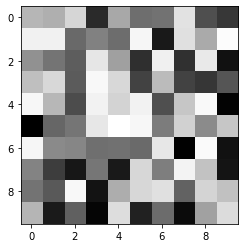

In [1516]:
for i in range (0,1):
    hop.update(new_inputs)
    hop.visualize_outputs()